In [16]:
import numpy as np
import insightface
import os
import glob
import cv2 
import matplotlib.pyplot as plt
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

In [17]:
print(np.__version__)

2.1.1


## Detecting the face

In [18]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0,det_size=(640,640))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\lenovo/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\lenovo/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\lenovo/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\lenovo/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\lenovo/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112]

<function matplotlib.pyplot.show(close=None, block=None)>

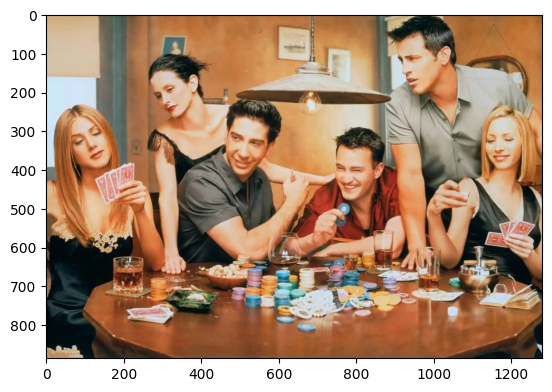

In [19]:
img = ins_get_image('t1')
plt.imshow(img[:,:,::-1])
plt.show

In [20]:
faces = app.get(img)


In [21]:
len(faces)

6

In [22]:
faces[0]

{'bbox': array([466.0821 , 268.6164 , 573.58923, 415.5331 ], dtype=float32),
 'kps': array([[491.85046, 321.8314 ],
        [541.85266, 332.11188],
        [507.67114, 366.41312],
        [485.91965, 369.691  ],
        [533.74945, 378.3811 ]], dtype=float32),
 'det_score': np.float32(0.9196533),
 'landmark_3d_68': array([[ 4.69443695e+02,  2.96989441e+02,  7.57227936e+01],
        [ 4.68134155e+02,  3.12719116e+02,  7.92197113e+01],
        [ 4.66747955e+02,  3.28960175e+02,  8.15076981e+01],
        [ 4.66053284e+02,  3.45325989e+02,  8.09227676e+01],
        [ 4.66922272e+02,  3.62514740e+02,  7.33340378e+01],
        [ 4.71003143e+02,  3.77187256e+02,  6.58566513e+01],
        [ 4.75966827e+02,  3.90255829e+02,  5.81926918e+01],
        [ 4.82846588e+02,  4.03262604e+02,  4.71076164e+01],
        [ 4.97964294e+02,  4.14659698e+02,  4.25628624e+01],
        [ 5.16660706e+02,  4.12995361e+02,  4.67766647e+01],
        [ 5.30892578e+02,  4.03689392e+02,  5.69011154e+01],
        [ 5.4

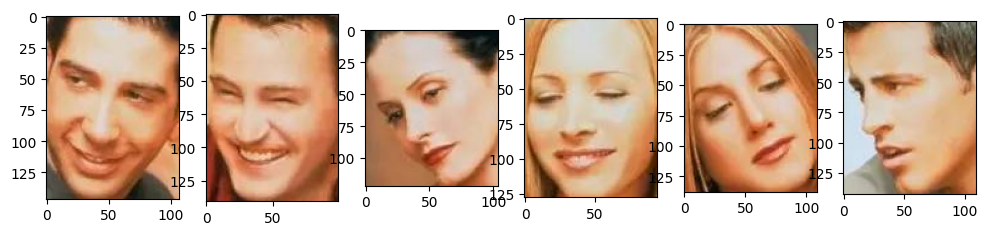

In [23]:
img = ins_get_image('t1')
fig, axs = plt.subplots(1,6, figsize = (12,5))

for i, face in enumerate(faces):
    bbox = face['bbox']
    bbox = [int(b) for b in bbox]
    axs[i].imshow(img[bbox[1]:bbox[3], bbox[0]:bbox[2],::-1])

## Face Swap

In [24]:
import insightface.model_zoo


swapper = insightface.model_zoo.get_model('inswapper_128.onnx',
                                          download = False,
                                          download_zip = False)


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


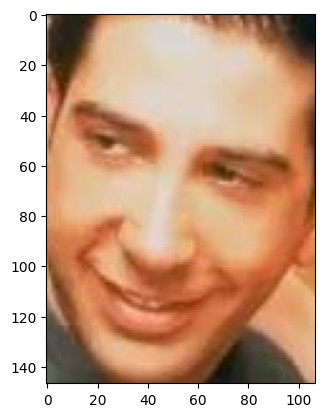

In [25]:
source_face = faces[0]
bbox = source_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

In [26]:
res = img.copy()
for face in faces:
    res = swapper.get(res, face, source_face, paste_back = True)

## Plot the swapped Faces

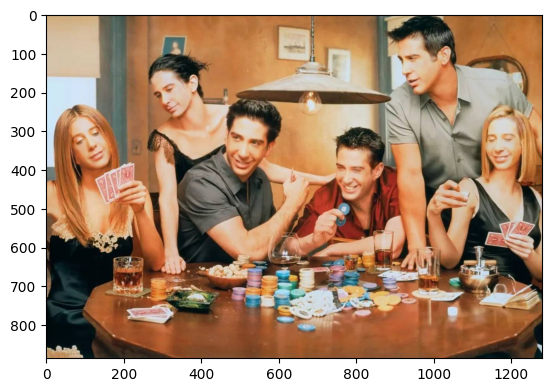

In [27]:
plt.imshow(res[:,:,::-1])
plt.show()

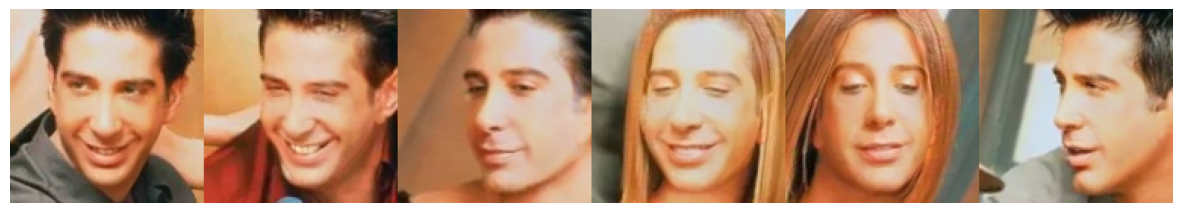

In [28]:
res = []
for face in faces:
    _img, _ = swapper.get(img, face, source_face, paste_back=False)
    res.append(_img)
res = np.concatenate(res, axis=1)
fig, ax = plt.subplots(figsize=(15,5))
ax.imshow(res[:,:,::-1])
ax.axis('off')
plt.show()

## Swapping My Face 

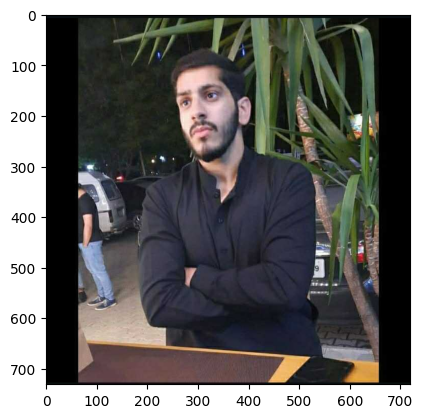

In [29]:
sami = cv2.imread("sami.jpg")
plt.imshow(sami[:,:,::-1])
plt.show()

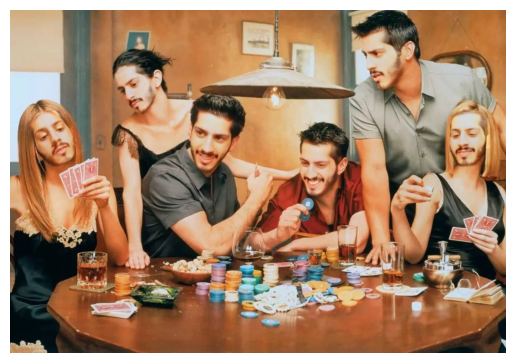

In [30]:
sami_faces = app.get(sami)
sami_face = sami_faces[0]

res = img.copy()
for face in faces:
    res = swapper.get(res, face, sami_face, paste_back=True)

fig, ax = plt.subplots()
ax.imshow(res[:,:,::-1])
ax.axis('off')
plt.show()

## Swapping my face with Saad's face


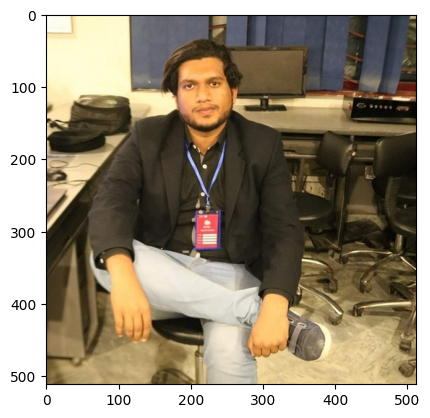

In [31]:
saad = cv2.imread('saad.jpg')
plt.imshow(saad[:,:,::-1])
plt.show()

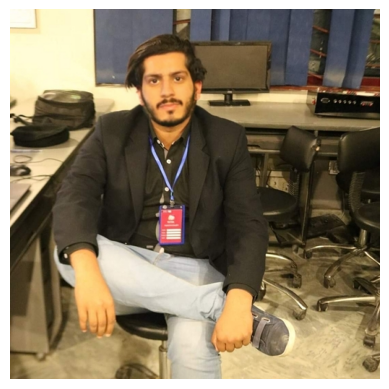

In [32]:
faces = app.get(saad)
res = saad.copy()
for face in faces:
    res = swapper.get(res, face, sami_face, paste_back=True)
fig, ax = plt.subplots()
ax.imshow(res[:,:,::-1])
ax.axis('off')
plt.show()

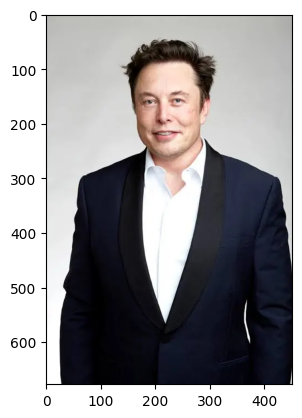

In [33]:
elon = cv2.imread('elon.jpg')
plt.imshow(elon[:,:,::-1])
plt.show()

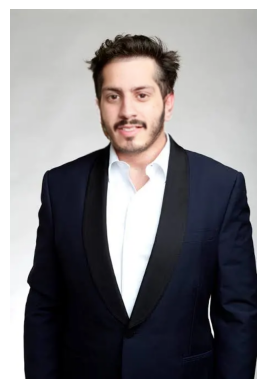

In [34]:
faces = app.get(elon)
res = elon.copy()
for face in faces:
    res = swapper.get(res, face, sami_face, paste_back=True)
fig, ax = plt.subplots()
ax.imshow(res[:,:,::-1])
ax.axis('off')
plt.show()